## Setup

This guide was written in Python 3.5.

### Python and Pip

Download [Python](https://www.python.org/downloads/) and [Pip](https://pip.pypa.io/en/stable/installing/).

Let's install the modules we'll need for this tutorial. Open up your terminal and enter the following commands to install the needed python modules: 

```
pip3 install scikit-learn
pip3 install scipy
```

## Introduction

Regression Analysis is a predictive modeling technique for figuring out the relationship between a dependent and independent variable. This is used for forecasting, time series modeling, among others. 


# Linear Regression

In Linear Regression, the dependent variable is continuous, and the independent variable(s) can be continuous or discrete, while nature of regression line is **linear**. Linear Regression establishes a relationship between the dependent variable (Y) and one or more independent variables (X), using a best fit straight line also known as regression line.

If the data actually lies on a line, then two sample points will be enough to get a perfect prediction. But, as in the example below, the input data is seldom perfect, so our “predictor” is almost always off by a bit. In this image, it's clear that only a small fraction of the data points appear to lie on the line itself.

![alt text](https://github.com/lesley2958/regression/blob/master/linreg.png?raw=true "Logo Title Text 1")

It's obvious that we can't assume a perfect prediction based off of data like this, so instead we wish to summarize the trends in the data using a simple description mechanism. In this case, that mechanism is a *line*. Now the computation required to find the “best” coefficients of the line is straightforward once we pick a suitable definition of “best”. *This is what we mean by best fit line.* 


## Basic Equation

The variable that we want to predict, `y`, is called the independent variable. We can collect values of y for known values of x to derive the co-efficient and y-intercept of the model using certain assumptions. The equation looks like below:

``` 
y = a + bx + e
```

Here, `a` is the y-intercept, `b` is the slope of the line, and `e` is the error term. Usually we don't know the error term, so we reduce this equation to:

```
y = a + bx
```

## Error Term

The difference between the observed value of the dependent variable and the predicted value is called the error term, or residual. Each data point has *its own* residual.

When a residual plot shows a random pattern, it indicated a good fit for a linear model. The error, or loss, function specifics depends on the type of machine learning algorithm. In Regression, it's (y - y&#770;)<sup>2</sup>, known as the <b>squared</b> loss. Note that the loss function is something that you must decide on based on the goals of learning. 

## Variance

Recall that variance gives us an idea of the range or spread of our data and that we denote this value as &sigma;<sup>2</sup>. In the context of regression, this matters because it gives us an idea of how accurate our model is.

For example, given the two graphs below, we can see that the second graph would be a more accurate model. 

![alt text](https://github.com/lesley2958/regression/blob/master/ther1.jpeg?raw=true "Logo Title Text 1")

![alt text](https://github.com/lesley2958/regression/blob/master/ther2.jpeg?raw=true "Logo Title Text 1")

To figure out how precise future predictions will be, we then need to see how much the outputs very around the mean population regression line. Unfortunately, as &sigma;<sup>2</sup> is a population parameter, so we will rarely know its true value - that means we have to estimate it. 

## Assumptions

There are four assumptions that allow for the use of linear regression models. If any of these assumptions is violated, then the forecasts, confidence intervals, and insights yielded by a regression model may be inefficient, biased, or misleading. 

### Linearity

The first assumption is the linearity and additivity between dependent and independent variables. Because of this assumption, the expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed. Lastly, the slope of this doesn't depend on the other variables. 

### Statistical Independence

The statistical independence of the errors means there is no correlation between consecutive errors.

### Homoscedasticity

This refers to the idea that there is a constant variance of errors. This is true against time, predictions, and any independent variable. 

### Error Distribution

This says that the distribution of errors is normal.


## Disadvantages

First, if the data doesn't follow the normal distribution, the validity of the regression model suffers. 

Secondly, there can be collinearity problems, meaning if two or more independent variables are strongly correlated, they will eat into each other's predictive power. 

Thirdly, if a large number of variables are included, the model may become unreliable. Regressions doesn't automatically take care of collinearity.

Lastly, regression doesn’t work with categorical variables with multiple values. These variables need to be converted to other variables before using them in regression models.

### Example 1

This example uses the first feature of the diabetes dataset to illustrate a two-dimensional plot of the linear regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

First, we input the needed modules and load the diabetes dataset:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
diabetes = datasets.load_diabetes()

Since we're only using one feature, we pick it out: 

In [3]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

Next, we split the data into training/testing sets

In [4]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

We do the same for the outputs: 

In [5]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Next, we create the linear regression object by calling the class:

In [6]:
regr = linear_model.LinearRegression()

Now, we're able to train the model using the training sets

In [7]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's take a look at what our coefficients are:

In [8]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 938.23786125]


#### Metrics

For regression, we use the **Sum of Squared Error**, which is the following formula:

$$ \sum_j \left[f(X_{j \cdot}) - y_j\right]^2. $$

In Python, you can compute this with `numpy` and built-in mathematical operators:

In [9]:
print(np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

2548.07239873


However, you can also use the built-in methods provided by `sklearn` to compute the mean squared error. 

In [10]:
print( metrics.mean_squared_error(regr.predict(diabetes_X_test), diabetes_y_test))

2548.07239873


Since the sum of squared error is susceptible to outliers, when a particular set of data contains outliers, we use the **Absolute Error** instead:

$$ \sum_j \left|f(X_{j \cdot}) - y_j\right|. $$

In Python, this looks very similar to the `mean_squared_error` function call:

In [11]:
print(metrics.mean_absolute_error(regr.predict(diabetes_X_test), diabetes_y_test))

41.2270912898


Now let's see what the variance is: 

In [12]:
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Variance score: 0.47


And finally, let's plot the outputs of the test data:

In [13]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

Let's see what we get! 

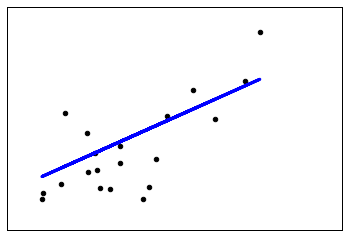

In [14]:
plt.xticks(())
plt.yticks(())
plt.show()

## Non Linear Regression

Non-linear regression analysis uses a curved function, usually a polynomial, to capture the non-linear relationship between the two variables. The regression is often constructed by optimizing the parameters of a higher-order polynomial such that the line best fits a sample of (x, y) observations.

There are cases where non-linear models are <b>intrinsically linear</b>, meaning they can be made linear by simple transformation. But more interestingly, are the ones where it can't.

While a polynomial regression might seem like the best option to produce a low error, it's important to be aware of the possibility of overfitting your data. Always plot the relationships to see the fit and focus on making sure that the curve fits the nature of the problem. 

![alt text](https://github.com/lesley2958/regression/blob/master/und-over.png?raw=true "Logo Title Text 1")


### Start Values

Finding good starting values is very important in non-linear regression to allow the model algorithm to converge. If you set starting parameters values completely outside of the range of potential parameter values the algorithm will either fail or it will return non-sensical parameter like for example returning a growth rate of 1000 when the actual value is 1.04.

The best way to find correct starting value is to eyeball the data, plotting them and based on the understanding that you have from the equation find approximate starting values for the parameters.


### Example 1

We begin by loading in the needed modules and data: 

In [15]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
xdata = np.array([-2,-1.64,-1.33,-0.7,0,0.45,1.2,1.64,2.32,2.9])
ydata = np.array([0.699369,0.700462,0.695354,1.03905,1.97389,2.41143,1.91091,0.919576,-0.730975,-1.42001])

Before we start, let's get a look at the scatterplot: 

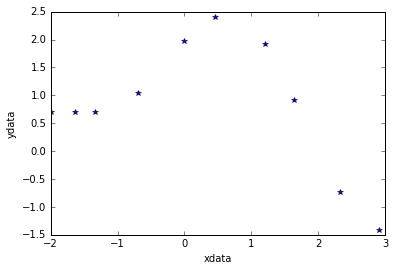

In [16]:
plt.plot(xdata,ydata,"*")
plt.xlabel("xdata")
plt.ylabel("ydata")
plt.show()

Here, I define the fit function:

In [17]:
def func(x, p1,p2):
  return(p1*np.cos(p2*x) + p2*np.sin(p1*x))

This is where we calculate and show fit parameters: 

In [18]:
popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))

Next, we calculate and show sum of squares of residuals since it's not given by the curve_fit function

In [19]:
p1 = popt[0]
p2 = popt[1]
residuals = ydata - func(xdata,p1,p2)
fres = sum(residuals**2)

And finally, let's plot the curve line along with our data:

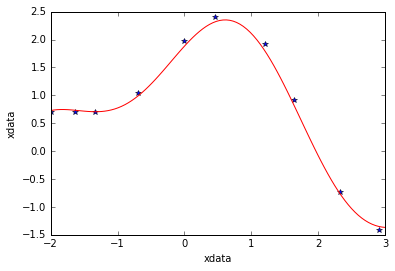

In [20]:
curvex = np.linspace(-2,3,100)
curvey = func(curvex,p1,p2)
plt.plot(xdata,ydata,"*")
plt.plot(curvex,curvey,"r")
plt.xlabel("xdata")
plt.ylabel("xdata")
plt.show()

# Multiple Linear Regression

Multiple linear regression is similar to simple linear regression, the only difference being the use of more than one input variable. This means we get a basic equation that's slightly different from linear regression.


## Basic Equation

In multiple linear regression, there is more than one explanatory variable. The basic equation we've seen before becomes:

Y<sub>i</sub> = m<sub>0</sub> + m<sub>1</sub>X<sub>1i</sub> + m<sub>2</sub>X<sub>2i</sub> + &isin;<sub>i</sub>

where &isin;<sub>i</sub> are independent random variables with a mean of 0. 

## Assumptions

The assumptions are the same as for simple regression.

## Mutlicollinearity

Recall, multicollinearity occurs when two or more variables are related. The best way of dealing with multicollinearity is to understand the cause and remove it. If one of the variables appears to be redundant, removing it can reduce multicollinearity. To make this decision, examine the correlations between variables.
 
Other strategies include:

- Figuring out if there is a way to combine the variables.
- Increasing the sample size of your study. 
- Centering the variables by computing the mean of each independent variable and then replacing each value with the difference between it and the mean.

## Example 1

Here, we import our `scikit-learn` module and declare our input data, X and Y, as lists:

In [21]:
from sklearn.linear_model import LinearRegression
x = [[2,4],[3,6],[4,5],[6,7],[3,3],[2,5],[5,2]]
y = [14,21,22,32,15,16,19]

Next, we initialize the model then train it on the data

In [22]:
genius_regression_model = LinearRegression()
genius_regression_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

And finally, we predict the corresponding value of Y for X = [8,4]

In [23]:
print(genius_regression_model.predict([8,4]))

[ 32.]


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## Logistic Regression

Logistic Regression is a statistical technique capable of predicting a <b>binary</b> outcome. Its output is a continuous range of values between 0 and 1, commonly representing the probability of some event occurring. Logistic regression is fairly intuitive and very effective - we'll review the details now.

### Example 1

Here, we'll use the Iris dataset from the Scikit-learn datasets module. We'll use 2 of the classes to keep this binary. 

First, let's begin by importing the needed modules and dataset: 

In [24]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
from __future__ import division
data = datasets.load_iris()

In [25]:
X = data.data[:100, :2]
y = data.target[:100]
X_full = data.data[:100, :]

Before we make the logistic regression function, let's take a look to see what we're working with:

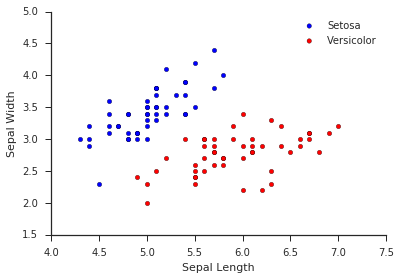

In [26]:
setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()
plt.show()

Now you can see that the two classes are completely separate! That means we can [more easily] find a function that separates the two classes. 

We want to return a value between 0 and 1 to represent a probability. To do this we make use of the logistic function. The logistic function mathematically looks like this:

![alt text](https://github.com/lesley2958/regression/blob/master/logistic%20function.png?raw=true "Logo Title Text 1")

Let's take a look at this plot:


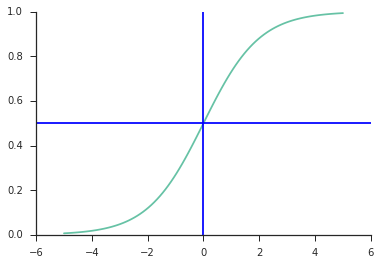

In [27]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.axhline(.5)
plt.axvline(0)
sns.despine()
plt.show()

You can see why this is a great function for a probability measure. The y-value represents the probability and only ranges between 0 and 1. Also, for an x value of zero you get a .5 probability and as you get more positive x values you get a higher probability and more negative x values a lower probability.

Recall the function from earlier, Y<sub>i</sub> = m<sub>0</sub> + m<sub>1</sub>X<sub>1i</sub> + m<sub>2</sub>X<sub>2i</sub> + &isin;<sub>i</sub>. We can assume that x is a linear combination of the data plus an intercept, so we get the following formula:

x = &beta;<sub>0</sub> + &beta;<sub>1</sub>SW + &beta;<sub>2</sub>SL

where SW is our sepal width and SL is our sepal length. But how do we get our &beta; values? This is where the learning in machine learning comes in. 

### Cost Function 

We want to choose Î² values to maximize the probability of correctly classifying our plants. If we assume our data are independent and identically distributed (iid), we can take the product of all our individually calculated probabilities and that is the value we want to maximize. We get the following formula:

![alt text](https://github.com/lesley2958/regression/blob/master/cost-logistic.png?raw=true "Logo Title Text 1")

This simplifies to: &prod;<sub>setosa</sub> h(x) &prod;<sub>versicolor</sub> 1 - h(x). So now we know what to maximize. We can also switch it to - &prod;<sub>setosa</sub> h(x) &prod;<sub>versicolor</sub> 1 - h(x) and minimize this since minimizing the negative is the same as maximizing the positive. 

We can implement this logistic function like this:

In [28]:
def logistic_func(theta, x):
    return (float(1) / (1 + math.e**(-x.dot(theta))))

And finally, in python, we put all the components together like this: 

In [29]:
def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return (np.mean(final))

### Gradients

We now know what value to minimize, but now we need to figure out how to find the &beta; values. This is where convex optimization comes in. 

Since we know the logistic cost function is convex, it has a single global minimum which we can converge using gradient descent. 

The idea behind gradient descent is to pick a point on the curve and follow it down to the minimum. The way we follow the curve is by calculating the gradients or the first derivatives of the cost function with respect to each &beta;.

Now if we define y<sub>i</sub> to be 1 for sentose and 0 for when it's versicolor, then we can simplify to h(x) and 1 - h(x). Recall [log rules](http://www.mathwords.com/l/logarithm_rules.htm). If we take the log of our cost function, our product becomes a sum:

![alt text](https://github.com/lesley2958/regression/blob/master/cost%20funct%202.png?raw=true "Logo Title Text 1")

The next step is to take the derivative with respect to &beta;<sub>0</sub>. Remembering that the derivate of log(x) is 1/x, we get:

![alt text](https://github.com/lesley2958/regression/blob/master/deriv.png?raw=true "Logo Title Text 1")

We have to take the derivative of h(x), which we can do with the quotient rule to see that it's: 

![alt text](https://github.com/lesley2958/regression/blob/master/deriv1.png?raw=true "Logo Title Text 1")

Since the derivative of x with respect to &beta;<sub>0</sub> is just 1, we can put all of this together to get: 

![alt text](https://github.com/lesley2958/regression/blob/master/deriv2.png?raw=true "Logo Title Text 1")

Now we can simplify this to y<sub>i</sub>(1-h(x<sub>i</sub>))-(1-y<sub>i</sub>)h(x<sub>i</sub>) = y<sub>i</sub>-y<sub>i</sub>h(x<sub>i</sub>)-h(x<sub>i</sub>)+y<sub>i</sub>h(x<sub>i</sub>) = y<sub>i</sub> - h(x<sub>i</sub>).

So finally we get: 

![alt text](https://github.com/lesley2958/regression/blob/master/final-gradient.png?raw=true "Logo Title Text 1")

For &beta;<sub>1</sub>, we get:

![alt text](https://github.com/lesley2958/regression/blob/master/beta1.png?raw=true "Logo Title Text 1")

For &beta;<sub>2</sub>, we get: 

![alt text](https://github.com/lesley2958/regression/blob/master/beta2.png?raw=true "Logo Title Text 1")

In Python, we can write:

In [30]:
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return (final_calc)

### Gradient Descent

So now that we have our gradients, we can use the gradient descent algorithm to find the values for our &beta;s that minimize our cost function. The algorithm is as follows:

1. Initially guess any values for &beta;
2. Repeat until we converge: &beta;<sub>i</sub> = &beta;<sub>i</sub>-(&alpha;* gradient with respect to &beta;<sub>i</sub>) for i = 0, 1, 2

Note that &alpha; is our learning rate, which is the rate at which we move towards our cost curve. 

Basically, we pick a random point on our cost curve, check to see which direction we need to go to get closer to the minimum by using the negative of the gradient, and then update our &beta; values to move closer to the minimum.

If we implement this all in python, we would get something like:

In [31]:
def grad_desc(theta_values, X, y, lr=.001, converge_change=.001):
    # normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    # setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return(theta_values, np.array(cost_iter))